<a href="https://colab.research.google.com/github/swathyrao/Final-data-cleaning/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("movies_metadata.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.shape

(45466, 24)

In [5]:
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
data.shape

(45466, 24)

In [7]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

## Adult

In [8]:
#data.loc[1,'adult'] ## adult -> convert to boolean
data.adult.unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [9]:
data.loc[~data.adult.isin(['False','True']),:]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.adult.unique()
data.adult.value_counts()


data = data.loc[data.adult.isin(['False','True']),:] # only choosing the rows where the adult column is either true or false
data.adult.unique()
#data.shape

array(['False', 'True'], dtype=object)

In [11]:
data.adult.values[0]

'False'

In [12]:
data.adult = data.adult.map({'True':1,'False':0}) #convert from string to 1/0


In [13]:
data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,0,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,0,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,0,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,0,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,0,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,0,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,0,NaN,0,[],NaN,227506,tt0008

# Belongs to Collection

In [14]:
data.belongs_to_collection.values[0]
#check if it is nan, if it is nan append 0, else - convert to a dict and append the name value

"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"

if the value is not nan, then convert string -> dictionary and get id value 
else if value is nan, append 0 to my ids

In [15]:
import ast
import numpy as np
ast.literal_eval(data.belongs_to_collection.values[0])

{'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg',
 'id': 10194,
 'name': 'Toy Story Collection',
 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg'}

In [16]:
2 == 2

True

In [17]:
2 == 2

True

In [18]:
import numpy as np
np.nan == np.nan

False

In [19]:
a = np.nan
a == a

False

all elements : (check if that value is ) str -> dict -> id

In [20]:
import ast

collectionIds = [] #list to store collections Ids - list that is going to store the vleaned value
for i in data['belongs_to_collection'].values: #Iterating through the column
    if i != i: # check if it is nan 
      collectionIds.append(-1) #append -1
      continue
    collectionIds.append(ast.literal_eval(i)['id'])

#collectionIds
data['collectionId'] = collectionIds
data = data.drop(columns = ['belongs_to_collection'])

In [21]:
data

,adult,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collectionId
0,0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10194
1,0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,-1
2,0,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,119050
3,0,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,-1
4,0,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,96871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,-1
45462,0,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,-1
45463,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,-1
45464,0,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 8875

# Budget

In [22]:
data.budget = data.budget.astype('int64') # explicilty type casting
data.budget.describe() #summary stats

count    4.546300e+04
mean     4.224579e+06
std      1.742413e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [23]:
sum(data.budget == 0)*100/data.shape[0]

80.44563711149726

1) Dont use budget
2) Try to look for some other dataset where these details are available
3) Bite the bullet and only do analysis with the rest of the data

In [24]:
data

,adult,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collectionId
0,0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10194
1,0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,-1
2,0,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,119050
3,0,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,-1
4,0,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,96871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,-1
45462,0,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,-1
45463,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,-1
45464,0,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 8875

# Genres

In [25]:
data.genres.values[0] #pandas -> string, list of dictionaries

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

I want to take 4 genres from the genres columns and contruct 4 columns genre1, genre2, genre3 and genre4 and each column will have an name corresponding to them, when genre is not available, I will map it to id ''

New Idea : Create a column for each genre - say 1 if the movie has the genre, else put 0

In [26]:
genres = set([])

for i in data.genres:
  genList = ast.literal_eval(i)
  for j in genList:
    genres.add(j['name'])


In [27]:
rows = [[]]
genres = list(genres)

for i in data.genres:
  genList = ast.literal_eval(i)
  movieGenres = [x['name'] for x in genList] # list of all the genres of the movie
  row = [] # store a list of 1s and 0s 
  for i in genres:
    row.append(int(i in movieGenres))
  rows.append(row)

In [28]:
genre = pd.DataFrame(rows[1:],columns = genres)
genre

,History,TV Movie,Crime,Documentary,War,Music,Action,Family,Mystery,Foreign,Western,Science Fiction,Adventure,Drama,Thriller,Comedy,Horror,Fantasy,Animation,Romance
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45458,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
45459,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
45460,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
45461,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
tmp = pd.concat([data,genre], axis = 1)
data.shape, genre.shape

((45463, 24), (45463, 20))

In [30]:
tmp

,adult,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collectionId,History,TV Movie,Crime,Documentary,War,Music,Action,Family,Mystery,Foreign,Western,Science Fiction,Adventure,Drama,Thriller,Comedy,Horror,Fantasy,Animation,Romance
0,0.0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,119050.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,96871.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0.0,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45462,0.0,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id'

In [31]:
len(genres)

20

In [32]:
# import ast
# index = 0
# gen1 = []

# for gen in data.genres.values:
#   genList = ast.literal_eval(gen) ## converts string to list of dictionary
#   if len(genList) > index: ##if the list has atleast one genre
#     gen1.append(genList[0]['name']) #mark the id of the genre
#   else:
#     gen1.append('') #mark 0 as the id

# data['genre1'] = gen1 #we have identified genre1

In [33]:
# import ast
# index = 1
# gen2 = []

# for gen in data.genres.values:
#   genList = ast.literal_eval(gen) #converts string to list
#   if len(genList) > index: # checks if the number of genres > 1
#     gen2.append(genList[1]['name']) #takes the 2nd genre and appends to a list
#   else:
#     gen2.append('') #if the genre 2 is not present, append 0

# data['genre2'] = gen2

In [34]:
# import ast
# index = 2
# gen3 = []

# for gen in data.genres.values:
#   genList = ast.literal_eval(gen)
#   if len(genList) > index:
#     gen3.append(genList[2]['name'])
#   else:
#     gen3.append('')

# data['genre3'] = gen3

In [35]:
# import ast
# index = 3
# gen4 = []

# for gen in data.genres.values:
#   genList = ast.literal_eval(gen)
#   if len(genList) > index:
#     gen4.append(genList[3]['name'])
#   else:
#     gen4.append('')

# data['genre4'] = gen4

In [36]:
sum(data.genre4 == '')*100/data.shape[0]

AttributeError: ignored

In [37]:
data = data.drop(columns = ['genres'])

In [38]:
data

,adult,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collectionId
0,0,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10194
1,0,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,-1
2,0,0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,119050
3,0,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,-1
4,0,0,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,96871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0,http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,-1
45462,0,0,NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,-1
45463,0,0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,-1
45464,0,0,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,-1


## Home Page

In [39]:
data.homepage.values[0]

'http://toystory.disney.com/toy-story'

In [40]:
data.homepage.isnull().sum()*100/data.shape[0]

82.88938257484108

In [41]:
data['homePagePresent'] = (~data.homepage.isnull()) #fasle- if null in home page else true

In [42]:
data = data.drop(columns = ['homepage'])

In [43]:
data

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collectionId,homePagePresent
0,0,30000000,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10194,True
1,0,65000000,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,-1,False
2,0,0,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,119050,False
3,0,16000000,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,-1,False
4,0,0,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,96871,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,-1,True
45462,0,0,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,-1,False
45463,0,0,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,-1,False
45464,0,0,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,-1,False


# Id

In [44]:
(data.shape[0] - len(data.id.unique())) #difference between movies and unique ids
data = data.drop_duplicates(subset = 'id')

In [45]:
(data.shape[0] - len(data.id.unique()))

0

In [46]:
data.imdb_id.values[0]
(data.shape[0] - len(data.imdb_id.unique()))
data = data.drop_duplicates(subset = 'imdb_id')

# Original Language

In [47]:
len(data.original_language.unique())
data.original_language.value_counts()
data.original_language.isnull().sum()
data.loc[data.original_language.isnull(),:]
data = data.dropna(subset = ['original_language'])

In [48]:
data.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'collectionId',
       'homePagePresent'],
      dtype='object')

# Title

In [49]:
data.title.isnull().sum(), len(data.title.unique())*100/data.shape[0]

(3, 93.05818614280051)

In [50]:
data.original_title.isnull().sum(), len(data.original_title.unique())*100/data.shape[0]

(0, 95.4631546491653)

In [51]:
data = data.drop(columns = ['title'])

In [52]:
data.original_title
"data science" == "Data  Science"

False

1) lower case upper case
2) remove unwanted spaces (data science, data  science)
3) checking spelling mistakes -> for places where there are a lot of chracters (textBlob)
4) handling special characters

In [53]:
data.original_title = data['original_title'].str.lower()
data.original_title = data['original_title'].str.strip()

In [54]:
data.original_title

0                          toy story
1                            jumanji
2                   grumpier old men
3                  waiting to exhale
4        father of the bride part ii
                    ...             
45461                        رگ خواب
45462            siglo ng pagluluwal
45463                       betrayal
45464            satana likuyushchiy
45465                       queerama
Name: original_title, Length: 45406, dtype: object

# Overview

In [55]:
data.overview = data.overview.str.lower()
data.overview = data.overview.str.strip()
data.overview

0        led by woody, andy's toys live happily in his ...
1        when siblings judy and peter discover an encha...
2        a family wedding reignites the ancient feud be...
3        cheated on, mistreated and stepped on, the wom...
4        just when george banks has recovered from his ...
                               ...                        
45461          rising and falling between a man and woman.
45462    an artist struggles to finish his work while a...
45463    when one of her hits goes wrong, a professiona...
45464    in a small town live two brothers, one a minis...
45465    50 years after decriminalisation of homosexual...
Name: overview, Length: 45406, dtype: object

# Popularity

In [56]:
data.popularity

0        21.946943
1        17.015539
2          11.7129
3         3.859495
4         8.387519
           ...    
45461     0.072051
45462     0.178241
45463     0.903007
45464     0.003503
45465     0.163015
Name: popularity, Length: 45406, dtype: object

In [57]:
data.popularity = data.popularity.astype('float64') ##floating point value
data.popularity.describe()
data.popularity.quantile(0.999)
# sum(data.popularity > 20)

42.63726434000442

In [58]:
##outlier detection - 1) domain knowledge 2) u need to handle them
data.popularity = data.popularity.clip(0,50)
#data = data.loc[(data.popularity > 0) & (data.popularity <= 100),:]

In [59]:
data.popularity.describe()

count    45403.000000
mean         2.859169
std          4.202630
min          0.000000
25%          0.386396
50%          1.128080
75%          3.680236
max         50.000000
Name: popularity, dtype: float64

# Vote Count and Vote Average

In [60]:
data.vote_count.describe()
data.vote_count.isna().sum()
data.vote_count[data.vote_count.isnull()] = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
data.vote_average = data.vote_average.astype('float64')
data.vote_count = data.vote_count.astype('int64')

In [62]:
data.vote_count.describe()

count    45406.000000
mean       109.990376
std        491.590432
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [63]:
data.vote_average.describe()

count    45403.000000
mean         5.619461
std          1.922518
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [64]:
data['score'] = (data.vote_average * data.vote_count)

# Poster Path

In [65]:
data.poster_path.values[0] #null value, unique values, file exists in the path or not

'/rhIRbceoE9lR4veEXuwCC2wARtG.jpg'

In [66]:
data.poster_path.isnull().sum()

381

In [67]:
import os
os.path.isfile('/rhIRbceoE9lR4veEXuwCC2wARtG.jpg')

False

In [68]:
data = data.drop(columns = ['poster_path'])

# Production Companies

In [69]:
data = data[~data.production_companies.isnull()]

In [70]:
data.production_companies.values[0]

"[{'name': 'Pixar Animation Studios', 'id': 3}]"

In [71]:
import ast
index = 0
prod1 = []

for prod in data.production_companies.values:
  prodList = ast.literal_eval(prod)
  if len(prodList) > index:
    prod1.append(prodList[index]['name'])
  else:
    prod1.append('')

data['Producer1'] = prod1

In [72]:
import ast
index = 1
prod2 = []

for prod in data.production_companies.values:
  prodList = ast.literal_eval(prod)
  if len(prodList) > index:
    prod2.append(prodList[index]['name'])
  else:
    prod2.append('')

data['Producer2'] = prod2

In [73]:
data = data.drop(columns = ['production_companies'])

In [74]:
data['Producer1'] = data['Producer1'].str.lower()
data['Producer2'] = data['Producer2'].str.lower()

In [75]:
data

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,collectionId,homePagePresent,score,Producer1,Producer2
0,0,30000000,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415,10194,True,41695.5,pixar animation studios,
1,0,65000000,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413,-1,False,16649.7,tristar pictures,teitler film
2,0,0,15602,tt0113228,en,grumpier old men,a family wedding reignites the ancient feud be...,11.712900,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92,119050,False,598.0,warner bros.,lancaster gate
3,0,16000000,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34,-1,False,207.4,twentieth century fox film corporation,
4,0,0,11862,tt0113041,en,father of the bride part ii,just when george banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173,96871,False,986.1,sandollar productions,touchstone pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,0,0,439050,tt6209470,fa,رگ خواب,rising and falling between a man and woman.,0.072051,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,False,4.0,1,-1,True,4.0,,
45462,0,0,111109,tt2028550,tl,siglo ng pagluluwal,an artist struggles to finish his work while a...,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,False,9.0,3,-1,False,27.0,sine olivia,
45463,0,0,67758,tt0303758,en,betrayal,"when one of her hits goes wrong, a professiona...",0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,False,3.8,6,-1,False,22.8,american world pictures,
45464,0,0,227506,tt0008536,en,satana likuyushchiy,"in a small town live two brothers, one a minis...",0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,NaN,False,0.0,0,-1,False,0.0,yermoliev,


# Release Dates

In [76]:
data.release_date.values[0]

'1995-10-30'

In [77]:
data.release_date.isnull().sum()

81

In [78]:
data.release_date

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45461           NaN
45462    2011-11-17
45463    2003-08-01
45464    1917-10-21
45465    2017-06-09
Name: release_date, Length: 45403, dtype: object

In [79]:
data = data.dropna(subset = ['release_date'])


In [80]:
data.release_date = pd.to_datetime(data.release_date, format='%Y-%m-%d', errors='ignore')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [81]:
data.release_date

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45460   1991-05-13
45462   2011-11-17
45463   2003-08-01
45464   1917-10-21
45465   2017-06-09
Name: release_date, Length: 45322, dtype: datetime64[ns]

In [82]:
import datetime
dateString = '10-10-2021'
date = datetime.datetime.strptime(dateString, "%d-%m-%Y") #string to datetime
date + datetime.timedelta(days = 15)
#date.strftime("%d-%B-%y") #datetime -> string

datetime.datetime(2021, 10, 25, 0, 0)

# Revenues

In [83]:
data.revenue = data.revenue.astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [84]:
data.revenue.describe()

count    4.532200e+04
mean     1.123960e+07
std      6.442643e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [85]:
sum(data.revenue == 0)*100/data.shape[0]

83.67900798729094

# RunTime

In [86]:
data.runtime = data.runtime.astype('float64')
data.runtime.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


count    45078.000000
mean        94.193753
std         38.336989
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [87]:
sum(data.runtime > 300)

107

In [88]:
data.loc[data.runtime < 20,:]

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,collectionId,homePagePresent,score,Producer1,Producer2
222,0,0,61813,tt0112899,en,dream man,kris is a homicide cop with psychic abilities....,0.155859,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-01-01,0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,2.5,1,-1,False,2.5,keystone pictures,dream man productions inc
224,0,0,62488,tt0112854,it,destiny turns on the radio,johnny destiny burns into las vegas in his hot...,0.710671,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-04-28,0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fate visits in ways you never expect,False,5.3,9,-1,False,47.7,savoy pictures,rysher entertainment
398,0,0,172923,tt0112889,en,dos crímenes,greed and playing into the hand of providence ...,0.233376,[],1995-05-26,0,0.0,[],Released,NaN,False,5.0,1,-1,False,5.0,,
554,0,0,218473,tt0109226,en,"the beans of egypt, maine","the beans are poor, proud, hated by all, but a...",0.382470,[],1994-01-01,0,0.0,[],Released,NaN,False,0.0,1,-1,False,0.0,,
667,0,0,221917,tt0114307,en,the run of the country,an irish lad (matt keeslar) who fled from his ...,0.117662,"[{'iso_3166_1': 'IE', 'name': 'Ireland'}, {'is...",1995-09-22,0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An unforgettable romance,False,8.0,2,-1,False,16.0,castle rock entertainment,columbia pictures corporation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45446,0,0,49271,tt0127948,en,le locataire diabolique,a man rents an apartment and furnishes it in r...,0.725084,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1909-01-01,0,6.0,[],Released,NaN,False,6.7,12,-1,False,80.4,star film company,
45447,0,0,44324,tt0135631,fr,le roi du maquillage,the background of this picture represents a sc...,0.213973,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1904-03-05,0,3.0,[],Released,NaN,False,6.0,6,-1,False,36.0,star film company,
45448,0,0,122036,tt0224286,fr,les transmutations imperceptibles,this shows a prince entering upon the stage of...,0.071782,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1904-01-01,0,2.0,[],Released,NaN,False,5.0,2,-1,False,10.0,star film company,
45450,0,0,49280,tt0135453,fr,l'homme orchestre,a band-leader has arranged seven chairs for th...,1.109068,"[{'iso_3166_1': 'FR', 'name': 'France'}]",1900-01-01,0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,False,6.5,22,-1,False,143.0,star film company,


# Spoken Languages

In [89]:
data.spoken_languages

0                 [{'iso_639_1': 'en', 'name': 'English'}]
1        [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2                 [{'iso_639_1': 'en', 'name': 'English'}]
3                 [{'iso_639_1': 'en', 'name': 'English'}]
4                 [{'iso_639_1': 'en', 'name': 'English'}]
                               ...                        
45460             [{'iso_639_1': 'en', 'name': 'English'}]
45462                    [{'iso_639_1': 'tl', 'name': ''}]
45463             [{'iso_639_1': 'en', 'name': 'English'}]
45464                                                   []
45465             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 45322, dtype: object

In [90]:
import ast
totalLanguages = []

for prod in data.spoken_languages.values:
  prodList = ast.literal_eval(prod) #converting from string to list of dictionary 
  totalLanguages.append(len(prodList)) #how many languages spoken?

data['TotalLanguages'] = totalLanguages

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [91]:
data = data.drop(columns = ['spoken_languages'])

In [92]:
data

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,production_countries,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,collectionId,homePagePresent,score,Producer1,Producer2,TotalLanguages
0,0,30000000,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,Released,NaN,False,7.7,5415,10194,True,41695.5,pixar animation studios,,1
1,0,65000000,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,Released,Roll the dice and unleash the excitement!,False,6.9,2413,-1,False,16649.7,tristar pictures,teitler film,2
2,0,0,15602,tt0113228,en,grumpier old men,a family wedding reignites the ancient feud be...,11.712900,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92,119050,False,598.0,warner bros.,lancaster gate,1
3,0,16000000,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,Released,Friends are the people who let you be yourself...,False,6.1,34,-1,False,207.4,twentieth century fox film corporation,,1
4,0,0,11862,tt0113041,en,father of the bride part ii,just when george banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106.0,Released,Just When His World Is Back To Normal... He's ...,False,5.7,173,96871,False,986.1,sandollar productions,touchstone pictures,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,0,0,30840,tt0102797,en,robin hood,"yet another version of the classic epic, with ...",5.683753,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0,104.0,Released,NaN,False,5.7,26,-1,False,148.2,westdeutscher rundfunk (wdr),working title films,1
45462,0,0,111109,tt2028550,tl,siglo ng pagluluwal,an artist struggles to finish his work while a...,0.178241,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0,360.0,Released,NaN,False,9.0,3,-1,False,27.0,sine olivia,,1
45463,0,0,67758,tt0303758,en,betrayal,"when one of her hits goes wrong, a professiona...",0.903007,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0,90.0,Released,A deadly game of wits.,False,3.8,6,-1,False,22.8,american world pictures,,1
45464,0,0,227506,tt0008536,en,satana likuyushchiy,"in a small town live two brothers, one a minis...",0.003503,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0,87.0,Released,NaN,False,0.0,0,-1,False,0.0,yermoliev,,0


# Status

In [93]:
data.status.value_counts()

Released           44886
Rumored              226
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

In [94]:
data.columns

Index(['adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'video',
       'vote_average', 'vote_count', 'collectionId', 'homePagePresent',
       'score', 'Producer1', 'Producer2', 'TotalLanguages'],
      dtype='object')

# Others

In [95]:
data.tagline.isnull().sum()

24936

In [96]:
data.video.value_counts()

False    45233
True        89
Name: video, dtype: int64

In [97]:
data = data.drop(columns = ['production_countries'])

In [98]:
data.drop(columns = ['video','tagline'])

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,vote_average,vote_count,collectionId,homePagePresent,score,Producer1,Producer2,TotalLanguages
0,0,30000000,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,7.7,5415,10194,True,41695.5,pixar animation studios,,1
1,0,65000000,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,6.9,2413,-1,False,16649.7,tristar pictures,teitler film,2
2,0,0,15602,tt0113228,en,grumpier old men,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101.0,Released,6.5,92,119050,False,598.0,warner bros.,lancaster gate,1
3,0,16000000,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Released,6.1,34,-1,False,207.4,twentieth century fox film corporation,,1
4,0,0,11862,tt0113041,en,father of the bride part ii,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911,106.0,Released,5.7,173,96871,False,986.1,sandollar productions,touchstone pictures,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,0,0,30840,tt0102797,en,robin hood,"yet another version of the classic epic, with ...",5.683753,1991-05-13,0,104.0,Released,5.7,26,-1,False,148.2,westdeutscher rundfunk (wdr),working title films,1
45462,0,0,111109,tt2028550,tl,siglo ng pagluluwal,an artist struggles to finish his work while a...,0.178241,2011-11-17,0,360.0,Released,9.0,3,-1,False,27.0,sine olivia,,1
45463,0,0,67758,tt0303758,en,betrayal,"when one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0,90.0,Released,3.8,6,-1,False,22.8,american world pictures,,1
45464,0,0,227506,tt0008536,en,satana likuyushchiy,"in a small town live two brothers, one a minis...",0.003503,1917-10-21,0,87.0,Released,0.0,0,-1,False,0.0,yermoliev,,0


# Final Data

In [99]:
data

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,collectionId,homePagePresent,score,Producer1,Producer2,TotalLanguages
0,0,30000000,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,NaN,False,7.7,5415,10194,True,41695.5,pixar animation studios,,1
1,0,65000000,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,Roll the dice and unleash the excitement!,False,6.9,2413,-1,False,16649.7,tristar pictures,teitler film,2
2,0,0,15602,tt0113228,en,grumpier old men,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92,119050,False,598.0,warner bros.,lancaster gate,1
3,0,16000000,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Released,Friends are the people who let you be yourself...,False,6.1,34,-1,False,207.4,twentieth century fox film corporation,,1
4,0,0,11862,tt0113041,en,father of the bride part ii,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911,106.0,Released,Just When His World Is Back To Normal... He's ...,False,5.7,173,96871,False,986.1,sandollar productions,touchstone pictures,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,0,0,30840,tt0102797,en,robin hood,"yet another version of the classic epic, with ...",5.683753,1991-05-13,0,104.0,Released,NaN,False,5.7,26,-1,False,148.2,westdeutscher rundfunk (wdr),working title films,1
45462,0,0,111109,tt2028550,tl,siglo ng pagluluwal,an artist struggles to finish his work while a...,0.178241,2011-11-17,0,360.0,Released,NaN,False,9.0,3,-1,False,27.0,sine olivia,,1
45463,0,0,67758,tt0303758,en,betrayal,"when one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0,90.0,Released,A deadly game of wits.,False,3.8,6,-1,False,22.8,american world pictures,,1
45464,0,0,227506,tt0008536,en,satana likuyushchiy,"in a small town live two brothers, one a minis...",0.003503,1917-10-21,0,87.0,Released,NaN,False,0.0,0,-1,False,0.0,yermoliev,,0


In [100]:
data.shape

(45322, 22)

In [101]:
dataBudgetRevenue  = data.loc[(data.budget != 0) & (data.revenue != 0),:]
dataBudgetRevenue

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,collectionId,homePagePresent,score,Producer1,Producer2,TotalLanguages
0,0,30000000,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,NaN,False,7.7,5415,10194,True,41695.5,pixar animation studios,,1
1,0,65000000,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,Roll the dice and unleash the excitement!,False,6.9,2413,-1,False,16649.7,tristar pictures,teitler film,2
3,0,16000000,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Released,Friends are the people who let you be yourself...,False,6.1,34,-1,False,207.4,twentieth century fox film corporation,,1
5,0,60000000,949,tt0113277,en,heat,"obsessive master thief, neil mccauley leads a ...",17.924927,1995-12-15,187436818,170.0,Released,A Los Angeles Crime Saga,False,7.7,1886,-1,False,14522.2,regency enterprises,forward pass,2
8,0,35000000,9091,tt0114576,en,sudden death,international action superstar jean claude van...,5.231580,1995-12-22,64350171,106.0,Released,Terror goes into overtime.,False,5.5,174,-1,False,957.0,universal pictures,imperial entertainment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,0,12000000,24049,tt0479751,ta,சிவாஜி,corrupt police and politicians target a comput...,1.323587,2007-06-14,19000000,185.0,Released,NaN,False,6.9,25,-1,False,172.5,avm productions,,2
45399,0,750000,280422,tt3805180,ru,все и сразу,NaN,0.201582,2014-06-05,3,0.0,Released,NaN,False,6.0,4,-1,False,24.0,кинокомпания «lunapark»,инвада фильм,1
45409,0,800000,62757,tt0933361,en,dikari,"the sea, august, interesting and simple people...",0.903061,2006-11-23,1328612,100.0,Released,NaN,False,5.8,6,-1,False,34.8,,,1
45412,0,2000000,63281,tt1718881,en,про любоff,"у девушки даши, приехавшей с подругой «покорят...",0.121844,2010-09-30,1268793,107.0,Released,NaN,False,4.0,3,-1,False,12.0,profit,,1


In [102]:
# dataBudgetRevenue.to_csv('finalCleanedData.csv')
# dataBudgetRevenue.columns
dataBudgetRevenue['profit'] = (dataBudgetRevenue.revenue - dataBudgetRevenue.budget)/dataBudgetRevenue.budget
#dataBudgetRevenue['profit%'].describe()
dataBudgetRevenue['profit'] = dataBudgetRevenue['profit'].clip(-1,50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [103]:
dataBudgetRevenue.to_csv('finalCleanedData.csv')

1. Profit = (Revenue - Budget)/Budget
2. Do the movies that have high vote_avergae make lot of profits ? 
3. What genres make the most money?
4. Which producers generally do well? 
5. Is there a bias with producers in terms of genres that they do - Do specific producer only produce specific genre movies?
6. Will a longer run time bring higher profits?
7. Does the presence of a homepage indicate higher profits
8. Which languages rakes in high profit
9. Over a period of time, how have the profitability changed - Over the period of time, which genre of movies have grossed well ? 
10. If the movie speaks multiple languages, is the profit % higher?

In [104]:
data = pd.read_csv("//finalCleanedData.csv")

In [105]:
data.head()

,Unnamed: 0,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,collectionId,homePagePresent,score,Producer1,Producer2,TotalLanguages


In [106]:
data.describe()

,Unnamed: 0,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,collectionId,homePagePresent,score,Producer1,Producer2,TotalLanguages
count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


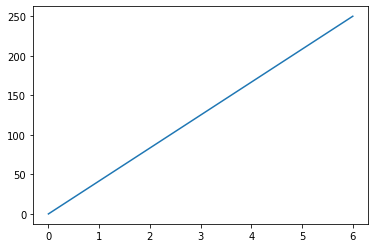

In [110]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 6])
ypoints = np.array([0, 250])

plt.plot(xpoints, ypoints)
plt.show()

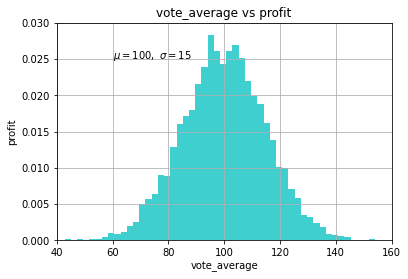

In [113]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='c', alpha=0.75)


plt.xlabel('vote_average')
plt.ylabel('profit')
plt.title('vote_average vs profit')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [115]:
data = pd.read_csv("//finalCleanedData.csv")

In [116]:
data.head()

,Unnamed: 0,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,collectionId,homePagePresent,score,Producer1,Producer2,TotalLanguages


In [117]:
data.describe()

,Unnamed: 0,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,video,vote_average,vote_count,collectionId,homePagePresent,score,Producer1,Producer2,TotalLanguages
count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [120]:
data.plot(x='runtime', y='adult', style='o')

plt.title('runtime vs adult')

plt.xlabel('runtime')

plt.ylabel('adult')

plt.show()

data[['runtime','adult']].corr()

TypeError: ignored